In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw10.ipynb")

# Homework 10: Linear Regression

**Helpful Resource:**
- [Python Reference](http://data8.org/fa21/python-reference.html): Cheat sheet of helpful array & table methods used in Data 8!

**Recommended Readings**: 
* [The Regression Line](https://www.inferentialthinking.com/chapters/15/2/Regression_Line.html)
* [Method of Least Squares](https://www.inferentialthinking.com/chapters/15/3/Method_of_Least_Squares.html)
* [Least Squares Regression](https://www.inferentialthinking.com/chapters/15/4/Least_Squares_Regression.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to setup the notebook by importing some helpful libraries. Each time you start your server, you will need to execute this cell again.

For all problems that you must write explanations and sentences for, you **must** provide your answer in the designated space. **Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook!** For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!

**Deadline:**

This assignment is due Friday, 11/12 at 11:59pm PT. Turn it in by Thursday 11:59pm PT for 5 extra credit points. Late work will not be accepted as per the [policies](http://data8.org/fa21/policies.html) page.


**Note: This homework has hidden tests on it. That means even though tests may say 100% passed, it doesn't mean your final grade will be 100%. We will be running more tests for correctness once everyone turns in the homework.**


Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies page to learn more about how to learn cooperatively.

You should start early so that you have time to get help if you're stuck. Office hours are held Monday-Friday. The schedule appears on [http://data8.org/fa21/office-hours.html](http://data8.org/fa21/office-hours.html).

In [2]:
# Run this cell to set up the notebook, but please don't change it.

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from datetime import datetime

## 1. Triple Jump Distances vs. Vertical Jump Heights 

Does skill in one sport imply skill in a related sport?  The answer might be different for different activities. Let's find out whether it's true for the [triple jump](https://en.wikipedia.org/wiki/Triple_jump) (a horizontal jump similar to a long jump) and the [vertical jump](https://en.wikipedia.org/wiki/Vertical_jump).  Since we're learning about linear regression, we will look specifically for a *linear* association between skill level in the two sports.

The following data was collected by observing 40 collegiate-level soccer players. Each athlete's distances in both events were measured in centimeters. Run the cell below to load the data.

In [28]:
# Run this cell to load the data
jumps = Table.read_table('triple_vertical.csv')
jumps.show()

triple,vertical
383,33
781,71.1
561.62,62.25
624.52,61.33
446.24,40.19
515.3,38.96
449.22,39.69
560.91,46.51
519.12,37.68
595.38,53.48


**Question 1.1.** Create a function `standard_units` that converts the values in the array `data` to standard units. **(5 points)**

<!--
BEGIN QUESTION
name: q1_1
manual: false
points:
 - 0
 - 0
 - 0
 - 5
-->

In [4]:
def standard_units(data):
    data_std = np.std(data)
    return (data - np.average(data)) / data_std

In [5]:
grader.check("q1_1")

q1_1 results: All test cases passed!

**Question 1.2.** Now, using the `standard_units` function, define the function `correlation` which computes the correlation between `x` and `y`. **(5 points)**

<!--
BEGIN QUESTION
name: q1_2
manual: false
points:
 - 0
 - 5
-->

In [10]:
def correlation(x, y):
    return np.average(standard_units(x) * standard_units(y)) 

In [11]:
grader.check("q1_2")

q1_2 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 1.3.** Before running a regression, it's important to see what the data looks like, because our eyes are good at picking out unusual patterns in data.  Draw a scatter plot, **that includes the regression line**, with the triple jump distances on the horizontal axis and the vertical jump heights on vertical axis. **(5 points)**

See the documentation on `scatter` [here](http://data8.org/datascience/_autosummary/datascience.tables.Table.scatter.html#datascience.tables.Table.scatter) for instructions on how to have Python draw the regression line automatically.

*Hint:* The `fit_line` argument may be useful here!

<!--
BEGIN QUESTION
name: q1_3
manual: true
image: true
-->

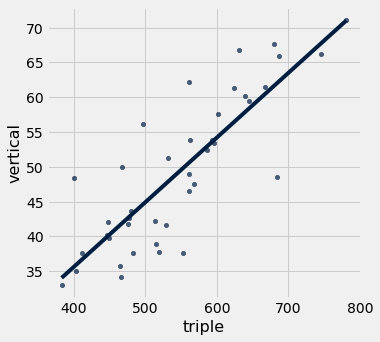

In [12]:
jumps.scatter('triple', 'vertical', fit_line=True)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 1.4.** Does the correlation coefficient $r$ look closest to 0, .5, or -.5? Explain. **(5 points)**

<!--
BEGIN QUESTION
name: q1_4
manual: true
-->

_Type your answer here, replacing this text._

<!-- END QUESTION -->

**Question 1.5.** Create a function called `parameter_estimates` that takes in the argument `tbl`, a two-column table where the first column is the x-axis and the second column is the y-axis. It should return an array with three elements: the **(1) correlation coefficient** of the two columns and the **(2) slope** and **(3) intercept** of the regression line that predicts the second column from the first, in original units. **(5 points)**

*Hint:* This is a rare occasion where it’s better to implement the function using column indices instead of column names, in order to be able to call this function on any table. If you need a reminder about how to use column indices to pull out individual columns, please refer to [this](https://www.inferentialthinking.com/chapters/06/Tables.html#accessing-the-data-in-a-column) section of the textbook.

<!--
BEGIN QUESTION
name: q1_5
manual: false
points:
 - 0
 - 0
 - 5
-->

In [19]:
def parameter_estimates(tbl):
    r = correlation(tbl.column(0), tbl.column(1))
    slope = r * np.std(tbl.column(1)) / np.std(tbl.column(0))
    intercept = np.average(tbl.column(1)) - np.average(tbl.column(0)) * slope
    return make_array(r, slope, intercept)

parameters = parameter_estimates(jumps) 
print('r:', parameters.item(0), '; slope:', parameters.item(1), '; intercept:', parameters.item(2))

r: 0.8343076972837598 ; slope: 0.09295728160512184 ; intercept: -1.566520972963474


In [20]:
grader.check("q1_5")

q1_5 results: All test cases passed!

**Question 1.6.** Now suppose you want to go the other way and predict a triple jump distance given a vertical jump distance. What would the regression parameters of this linear model be? How do they compare to the regression parameters from the model where you were predicting vertical jump distance given a triple jump distance (in Question 1.5)? **(5 points)**

Set `regression_changes` to an array of 3 elements, with each element corresponding to whether or not the corresponding item returned by `parameter_estimates` changes when switching vertical and triple as $x$ and $y$. For example, if r changes, the slope changes, but the intercept wouldn't change, the array would be `make_array(True, True, False)`.

<!--
BEGIN QUESTION
name: q1_6
manual: false
points:
 - 0
 - 0
 - 5
-->

In [23]:
regression_changes = parameter_estimates(jumps.select(1, 0)) == parameters
regression_changes

array([ True, False, False])

In [24]:
grader.check("q1_6")

q1_6 results: All test cases passed!

**Question 1.7.** Let's use `parameters` (from Question 1.5) to predict what certain athletes' vertical jump heights would be given their triple jump distances. **(5 points)**

The world record for the triple jump distance is 18.29 *meters* by Johnathan Edwards. What is the prediction for Edwards' vertical jump using this line?

*Hint:* Make sure to convert from meters to centimeters!

<!--
BEGIN QUESTION
name: q1_7
manual: false
points:
 - 0
 - 5
-->

In [26]:
triple_record_vert_est = 1829 * parameters.item(1) + parameters.item(2)
print("Predicted vertical jump distance: {:f} centimeters".format(triple_record_vert_est))

Predicted vertical jump distance: 168.452347 centimeters


In [27]:
grader.check("q1_7")

q1_7 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 1.8.** Do you think it makes sense to use this line to predict Edwards' vertical jump? **(5 points)**

*Hint:* Compare Edwards' triple jump distance to the triple jump distances in `jumps`. Is it relatively similar to the rest of the data? 

<!--
BEGIN QUESTION
name: q1_8
manual: true
-->

_Type your answer here, replacing this text._

<!-- END QUESTION -->



## 2. Cryptocurrencies

Imagine you're an investor in December 2017. Cryptocurrencies, online currencies backed by secure software, are becoming extremely valuable, and you want in on the action!

The two most valuable cryptocurrencies are Bitcoin (BTC) and Ethereum (ETH). Each one has a dollar price attached to it at any given moment in time. For example, on December 1st, 2017, one BTC costs $\$10,859.56$ and one ETH costs $\$424.64.$

For fun, you can here are the current prices of [Bitcoin](https://www.coinbase.com/price/bitcoin) and [Ethereum](https://www.coinbase.com/price/ethereum)!

**You want to predict the price of ETH at some point in time based on the price of BTC.** Below, we load two [tables](https://www.kaggle.com/jessevent/all-crypto-currencies/data) called `btc` and `eth`. Each has 5 columns:
* `date`, the date
* `open`, the value of the currency at the beginning of the day
* `close`, the value of the currency at the end of the day
* `market`, the market cap or total dollar value invested in the currency
* `day`, the number of days since the start of our data

In [29]:
btc = Table.read_table('btc.csv')
btc

date,open,close,market,day
2015-09-29,239.02,236.69,3505090000,1
2015-09-30,236.64,236.06,3471280000,2
2015-10-01,236,237.55,3462800000,3
2015-10-02,237.26,237.29,3482190000,4
2015-10-03,237.2,238.73,3482100000,5
2015-10-04,238.53,238.26,3502460000,6
2015-10-05,238.15,240.38,3497740000,7
2015-10-06,240.36,246.06,3531230000,8
2015-10-07,246.17,242.97,3617400000,9
2015-10-08,243.07,242.3,3572730000,10


In [30]:
eth = Table.read_table('eth.csv')
eth

date,open,close,market,day
2015-09-29,0.579414,0.661146,42607700,1
2015-09-30,0.661192,0.738644,48636600,2
2015-10-01,0.734307,0.690215,54032300,3
2015-10-02,0.683732,0.678574,50328700,4
2015-10-03,0.678783,0.687171,49981900,5
2015-10-04,0.686343,0.668379,50556000,6
2015-10-05,0.666784,0.628643,49131600,7
2015-10-06,0.622218,0.650645,45863300,8
2015-10-07,0.650515,0.609388,47964700,9
2015-10-08,0.609501,0.621716,44955900,10


<!-- BEGIN QUESTION -->

**Question 2.1.** In the cell below, create a line plot that visualizes the BTC and ETH open prices as a function of time. Both BTC and ETH open prices should be plotted on the same graph. **(5 points)**

<!--
BEGIN QUESTION
name: q2_1
manual: true
image: true
-->

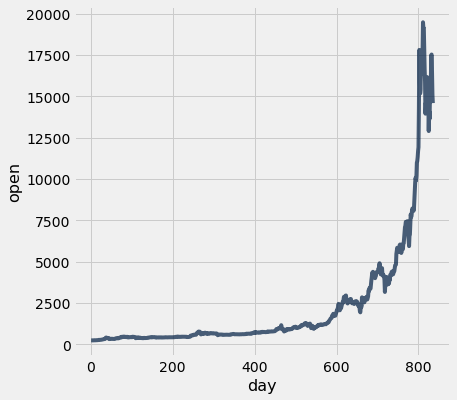

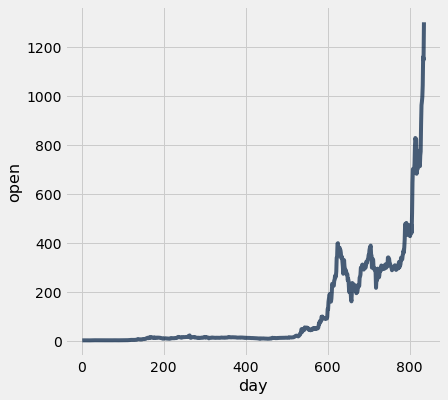

In [32]:
# Create a line plot of btc and eth open prices as a function of time
btc.plot('day', 'open')
eth.plot('day', 'open')

<!-- END QUESTION -->

**Question 2.2.** Now, calculate the correlation coefficient between the opening prices of BTC and ETH using the `correlation` function you defined earlier. **(5 points)**

<!--
BEGIN QUESTION
name: q2_2
manual: false
points:
 - 0
 - 0
 - 5
-->

In [33]:
r = correlation(btc.column('open'), eth.column('open'))
r

0.9250325764148278

In [34]:
grader.check("q2_2")

q2_2 results: All test cases passed!

**Question 2.3.** Write a function `eth_predictor` which takes an opening BTC price and predicts the opening price of ETH. Again, it will be helpful to use the function `parameter_estimates` that you defined earlier in this homework. **(5 points)**

*Note:* Make sure that your `eth_predictor` is using least squares linear regression.

<!--
BEGIN QUESTION
name: q2_3
manual: false
points:
 - 0
 - 5
-->

In [37]:
def eth_predictor(btc_price):
    parameters = Table().with_columns(
        'btc_open', btc.column('open'),
    'eth_open', eth.column('open'))
    slope = parameter_estimates(parameters).item(1)
    intercept = parameter_estimates(parameters).item(2)
    return btc_price * slope + intercept

In [38]:
grader.check("q2_3")

q2_3 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 2.4.** Now, using the `eth_predictor`, you defined in the previous question, make a scatter plot with BTC prices along the x-axis and both real and predicted ETH prices along the y-axis. The color of the dots for the real ETH prices should be different from the color for the predicted ETH prices. **(5 points)**

*Hint 1:* An example of such a scatter plot is generated can be found [here](https://inferentialthinking.com/chapters/15/2/Regression_Line.html). </a>

*Hint 2:* Think about the table that must be produced and used to generate this scatter plot. What data should the columns represent? Based on the data that you need, how many columns should be present in this table? Also, what should each row represent? Constructing the table will be the main part of this question; once you have this table, generating the scatter plot should be straightforward as usual.

<!--
BEGIN QUESTION
name: q2_4
manual: true
image: true
-->

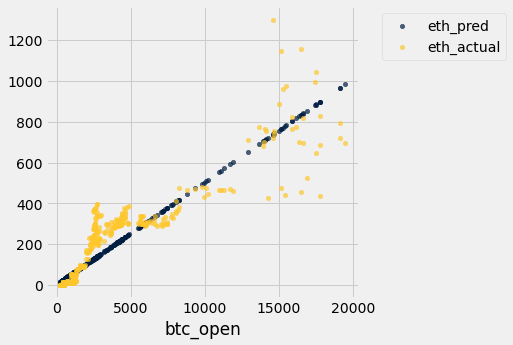

In [39]:
btc_open = btc.column('open')
eth_pred = btc.apply(eth_predictor, 'open')
eth_pred_actual = eth.column('open')
eth_predict_tbl = Table().with_columns('btc_open', btc_open,
                                      'eth_pred', eth_pred,
                                      'eth_actual', eth_pred_actual)
eth_predict_tbl.scatter('btc_open')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.5.** Considering the shape of the scatter plot of the true data, is the model we used reasonable? If so, what features or characteristics make this model reasonable? If not, what features or characteristics make it unreasonable? **(5 points)**

<!--
BEGIN QUESTION
name: q2_5
manual: true
-->

_Type your answer here, replacing this text._

<!-- END QUESTION -->



## 3. Evaluating NBA Game Predictions

#### A Brief Introduction to Sports Betting

In a basketball game, each team scores some number of points.  Conventionally, the team playing at its own arena is called the "home team", and their opponent is called the "away team".  The winner is the team with more points at the end of the game.

We can summarize what happened in a game by the "**outcome**", defined as the **the away team's score minus the home team's score**:

$$\text{outcome} = \text{points scored by the away team} - \text{points scored by the home team}$$

If this number is positive, the away team won.  If it's negative, the home team won. 

In order to facilitate betting on games, analysts at casinos try to predict the outcome of the game. This prediction of the outcome is called the **spread.**


In [40]:
spreads = Table.read_table("spreads.csv")
spreads

Date,Home Team,Away Team,Home Points,Away Points,Outcome,Spread
4/10/2015,Utah,Memphis,88,89,1,2.5
3/10/2015,Utah,New York,87,82,-5,-13
11/19/2014,Indiana,Charlotte,88,86,-2,-2
11/15/2014,Chicago,Indiana,90,99,9,-9
3/25/2015,Utah,Portland,89,92,3,-2
3/3/2015,Memphis,Utah,82,93,11,-7
3/18/2015,Utah,Washington,84,88,4,-3
3/16/2015,Utah,Charlotte,94,66,-28,-4.5
1/24/2015,Charlotte,New York,76,71,-5,-9
11/7/2014,Oklahoma City,Memphis,89,91,2,7


Here's a scatter plot of the outcomes and spreads, with the spreads on the horizontal axis.

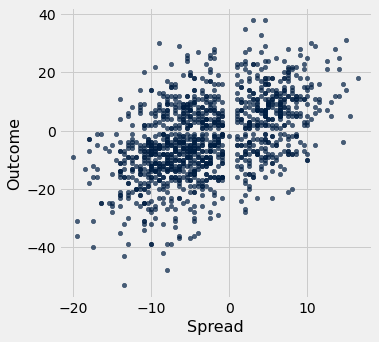

In [41]:
spreads.scatter("Spread", "Outcome")

From the scatter plot, you can see that the spread and outcome are almost never 0, aside from one case of the spread being 0. This is because a game of basketball never ends in a tie. One team has to win, so the outcome can never be 0. The spread is almost never 0 because it's chosen to estimate the outcome.

Let's investigate how well the casinos are predicting game outcomes.

One question we can ask is: Is the casino's prediction correct on average? In other words, for every value of the spread, is the average outcome of games assigned that spread equal to the spread? If not, the casino would apparently be making a systematic error in its predictions.

**Question 3.1** Compute the correlation coefficient between outcomes and spreads. **(5 points)**

*Note:* It might be helpful to use the `correlation` function.

<!--
BEGIN QUESTION
name: q3_1
manual: false
points:
 - 0
 - 5
-->

In [42]:
spread_r = correlation(spreads.column('Spread'), spreads.column('Outcome'))
spread_r

0.49181413688314235

In [43]:
grader.check("q3_1")

q3_1 results: All test cases passed!

**Question 3.2.** Among games with a spread between 3.5 and 6.5 (including both 3.5 and 6.5), what was the average outcome? **(5 points)**

*Hint:* Read the documentation for the predicate `are.between_or_equal_to` [here](http://data8.org/datascience/predicates.html#datascience.predicates.are.between_or_equal_to).

<!--
BEGIN QUESTION
name: q3_2
manual: false
points:
 - 0
 - 5
-->

In [44]:
spreads_around_5 = spreads.where('Spread', are.between_or_equal_to(3.5, 6.5))
spread_5_outcome_average = np.average(spreads_around_5.column('Outcome'))
print("Average outcome for spreads around 5:", spread_5_outcome_average)

Average outcome for spreads around 5: 4.9941176470588236


In [45]:
grader.check("q3_2")

q3_2 results: All test cases passed!

**Question 3.3.** Use the function `parameter_estimates` that you defined earlier in this homework to compute the least-squares linear regression line that predicts outcomes from spreads, in original units. We have provided a two column table for you in the cell below with the first column representing `Spread` (x) and the second column representing `Outcome` (y), which you should use as an argument to the function. **(5 points)**

<!--
BEGIN QUESTION
name: q3_3
manual: false
points:
 - 0
 - 0
 - 2
 - 3
-->

In [46]:
compute_tbl = spreads.select('Spread', 'Outcome')
estimates = parameter_estimates(compute_tbl)
spread_slope = estimates.item(1)
spread_intercept = estimates.item(2)
print("Slope:", round(spread_slope, 3))
print("Intercept", round(spread_intercept, 3))

Slope: 0.954
Intercept 0.22


In [47]:
grader.check("q3_3")

q3_3 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 3.4.** Suppose that we create another predictor that simply predicts the average outcome regardless of the value for spread. Does this new predictor minimize least squared error? Explain. **(5 points)**

<!--
BEGIN QUESTION
name: q3_4
manual: true
-->

_Type your answer here, replacing this text._

<!-- END QUESTION -->



### Fitting a Least-Squares Regression Line

Recall that the least-squares regression line is the unique straight line that minimizes root mean squared error (RMSE) among all possible fit lines. Using this property, we can find the equation of the regression line by finding the pair of slope and intercept values that minimize root mean squared error. 

**Question 3.5.** Define a function called `errors`.  It should take three arguments:
1. a table like `spreads` (with the same column names and meanings, but not necessarily the same data)
2. the slope of a line (a number)
3. the intercept of a line (a number).

It should return an array of the errors made when a line with that slope and intercept is used to predict outcome from spread for each game in the given table. **(3 points)**

<!--
BEGIN QUESTION
name: q3_5
manual: false
points:
 - 0
 - 0
 - 3
-->

In [56]:
def errors(tbl, slope, intercept):
    return tbl.column('Outcome') - (slope * tbl.column('Spread') + intercept)

In [57]:
grader.check("q3_5")

q3_5 results: All test cases passed!

**Question 3.6.** Using `errors`, compute the errors for the line with slope `0.5` and intercept `25` on the `spreads` dataset. Name that array `spread_errors`.  Then, make a scatter plot of the errors. **(3 points)**

*Hint:* To make a scatter plot of the errors, plot the error for each outcome in the dataset.  Put the actual spread on the horizontal axis and the outcome error on the vertical axis.

<!--
BEGIN QUESTION
name: q3_6
manual: false
points:
 - 3
-->

-25.25

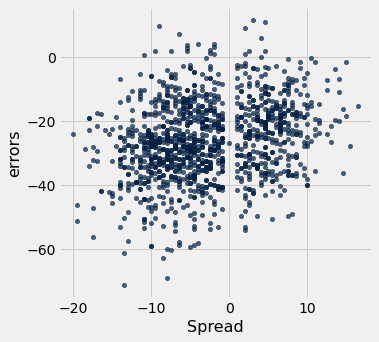

In [58]:
spread_errors = errors(spreads, 0.5, 25)
errors_tbl = Table().with_columns('Spread', spreads.column('Spread'),
                                 'errors', spread_errors)
errors_tbl.scatter('Spread', 'errors')

In [59]:
grader.check("q3_6")

q3_6 results: All test cases passed!

You should find that the errors are almost all negative.  That means our line is not the best fit to our data.  Let's find a better one.

**Question 3.7.** Define a function called `fit_line`.  It should take a table like `spreads` (with the same column names and meanings) as its argument.  It should return an array containing the slope (as the first element) and intercept (as the second element) of the least-squares regression line predicting outcome from spread for that table. **(3 points)**

*Hint*: Define a function `rmse` within `fit_line` that takes a slope and intercept as its arguments. `rmse` will use the table passed into `fit_line` to compute predicted outcomes and then return the root mean squared error between the predicted and actual outcomes. Within `fit_line`, you can call `rmse` the way you would any other function.

If you haven't tried to use the `minimize` [function](http://data8.org/fa19/python-reference.html) yet, now is a great time to practice. Here's an [example from the textbook](https://www.inferentialthinking.com/chapters/15/3/Method_of_Least_Squares.html#numerical-optimization).

<!--
BEGIN QUESTION
name: q3_7
manual: false
points:
 - 0
 - 0
 - 3
-->

In [69]:
def fit_line(tbl):
    # Your code may need more than 1 line below here.
    def rmse(slope, intercept):
        x = spreads.column('Spread')
        y = spreads.column('Outcome')
        fitted = slope * x + intercept
        return  np.mean((y - fitted) ** 2) ** 0.5
    return minimize(rmse)
    
# Here is an example call to your function.  To test your function,
# figure out the right slope and intercept by hand.
example_table = Table().with_columns(
    "Spread", make_array(0, 1),
    "Outcome", make_array(1, 3))
fit_line(example_table)

array([0.95381578, 0.21783491])

In [70]:
grader.check("q3_7")

q3_7 results: All test cases passed!

**Question 3.8.** Use `fit_line` to fit a line to `spreads`, and assign the output to `best_line`. Assign the first and second elements in `best_line` to `best_line_slope` and `best_line_intercept`, respectively. **(3 points)**

Then, set `new_errors` to the array of errors that we get by calling `errors` with our new line. The following line will graph the corresponding residual plot with a best fit line.

*Hint:* Make sure that the residual plot makes sense. What qualities should the best fit line of a residual plot have?

<!--
BEGIN QUESTION
name: q3_8
manual: false
points:
 - 0
 - 1
 - 1
 - 1
-->

'Slope: 0.953816 | Intercept: 0.217835'

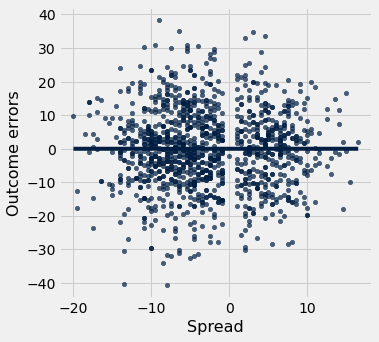

In [71]:
best_line = fit_line(spreads)
best_line_slope = best_line.item(0)
best_line_intercept = best_line.item(1)

new_errors = errors(spreads, best_line_slope, best_line_intercept)

# This code displays the residual plot, given your values for the best_line_slope and best_line_intercept
Table().with_columns("Spread", 
                    spreads.column("Spread"), 
                    "Outcome errors", 
                    new_errors
                   ).scatter("Spread", "Outcome errors", fit_line=True)

# This just prints your slope and intercept
"Slope: {:g} | Intercept: {:g}".format(best_line_slope, best_line_intercept)

In [72]:
grader.check("q3_8")

q3_8 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 3.9.** The slope and intercept pair you found in Question 3.8 should be very similar to the values that you found in Question 3.3. Why were we able to minimize RMSE to find the same slope and intercept from the previous formulas? **(3 points)**

<!--
BEGIN QUESTION
name: q3_9
manual: true
-->

_Type your answer here, replacing this text._

<!-- END QUESTION -->



You're done with Homework 10!  

**Important submission steps:** 
1. Run the tests and verify that they all pass.
2. Choose **Save and Checkpoint** from the **File** menu, then **run the final cell**. 
3. Click the link to download the zip file.
4. Go to [Gradescope](https://www.gradescope.com/courses/288788) and submit the zip file to the corresponding assignment. The name of this assignment is "HW 10 Autograder". 

**It is your responsibility to make sure your work is saved before running the last cell.**

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [73]:
grader.check_all()

q1_1 results: All test cases passed!

q1_2 results: All test cases passed!

q1_5 results: All test cases passed!

q1_6 results: All test cases passed!

q1_7 results: All test cases passed!

q2_2 results: All test cases passed!

q2_3 results: All test cases passed!

q3_1 results: All test cases passed!

q3_2 results: All test cases passed!

q3_3 results: All test cases passed!

q3_5 results: All test cases passed!

q3_6 results: All test cases passed!

q3_7 results: All test cases passed!

q3_8 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, force_save=True)